In [1]:
import tensorflow as tf
from tensorflow.keras import initializers
import matplotlib.pyplot as plt
import pickle

In [13]:
f=open("dataset.pickle", "rb")
(X_train, y_train, X_val, y_val, X_test, y_test)=pickle.load(f)

In [46]:
model=tf.keras.Sequential()

In [47]:
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 128, 1)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.4))


In [48]:
model.add(tf.keras.layers.Flatten())

In [49]:
model.add(tf.keras.layers.Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation="softmax",use_bias=True, 
                                kernel_regularizer='l2')
                                 )

In [50]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])

In [51]:
results=model.fit(X_train, y_train,
                  epochs=10,
                 validation_data=(X_val, y_val))

Epoch 1/10
219/219 [==============================] - 28s 123ms/step - loss: 1.9631 - accuracy: 0.3631 - val_loss: 1.5220 - val_accuracy: 0.4765
Epoch 2/10
219/219 [==============================] - 27s 121ms/step - loss: 1.2970 - accuracy: 0.5853 - val_loss: 1.1927 - val_accuracy: 0.6380
Epoch 3/10
219/219 [==============================] - 27s 122ms/step - loss: 1.0227 - accuracy: 0.6790 - val_loss: 0.7799 - val_accuracy: 0.7789
Epoch 4/10
219/219 [==============================] - 27s 122ms/step - loss: 0.8128 - accuracy: 0.7492 - val_loss: 0.7052 - val_accuracy: 0.7847
Epoch 5/10
219/219 [==============================] - 27s 121ms/step - loss: 0.6755 - accuracy: 0.7890 - val_loss: 0.5466 - val_accuracy: 0.8465
Epoch 6/10
219/219 [==============================] - 27s 122ms/step - loss: 0.6000 - accuracy: 0.8208 - val_loss: 0.4699 - val_accuracy: 0.8591
Epoch 7/10
219/219 [==============================] - 27s 122ms/step - loss: 0.5250 - accuracy: 0.8407 - val_loss: 0.4263 - val_ac

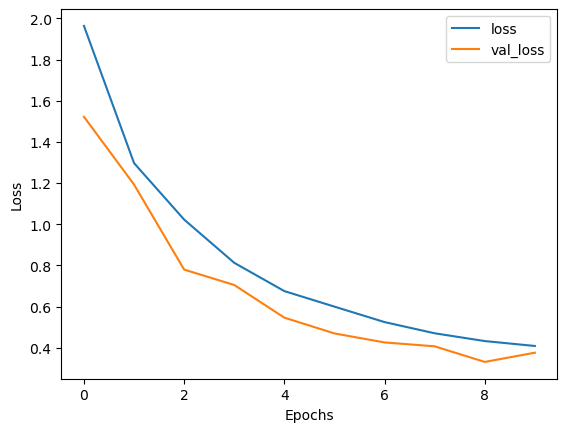

In [52]:
plt.plot(results.history['loss'], label="loss")
# Plot the the validation loss
plt.plot(results.history['val_loss'], label="val_loss")

# Name the x and y axises
plt.xlabel("Epochs")
plt.ylabel("Loss")
# Put legend table
plt.legend()
# Show the plot
plt.show()

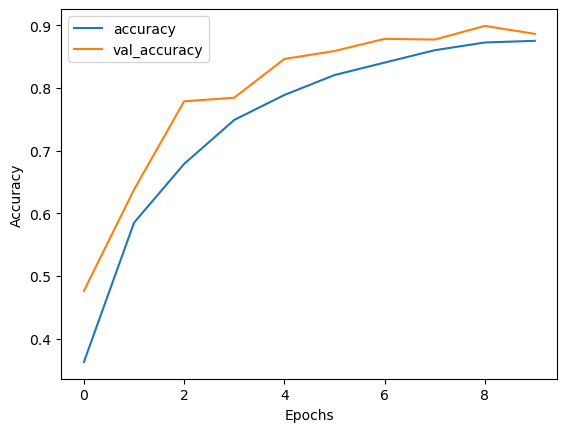

In [53]:
plt.plot(results.history['accuracy'], label="accuracy")


# Plot the the validation accuracy
plt.plot(results.history['val_accuracy'], label="val_accuracy")

# Name the x and y axises
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

# Put legend table
plt.legend()

# Show the plot
plt.show()

In [54]:
model.evaluate(X_test, y_test)

28/28 [==============================] - 1s 35ms/step - loss: 0.4057 - accuracy: 0.8833


[0.40572768449783325, 0.8832951784133911]